## Soare plot

In [147]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
d = pickle.load(open('results_Linear-Soare_500.pkl','rb'))
idx_star = d['idx_star']
reps = d['reps']
d_alg = d['algs']
xaxis = d['xaxis']

In [148]:
import ast
arrays = []

with open('/PureExpThompsonSampling/results_soare_500_LinGame.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        #print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
    
reps = len(arrays)
xaxis_g = np.arange(n_iters)
m_g = (recs == idx_star+1).mean(axis=0)
s_g = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_g = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

iters 4997 reps 1000


In [149]:
arrays = []

with open('/PureExpThompsonSampling/results_soare_500_LinGapE.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        #print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
m_lge = (recs == idx_star+1).mean(axis=0)
s_lge = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_lge = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

iters 4997 reps 1000


In [150]:
arrays = []

with open('/PureExpThompsonSampling/results_soare_500_oracle.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        #print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
m_o = (recs == idx_star+1).mean(axis=0)
s_o = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_o = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

iters 4997 reps 1000


[   0    1    2 ... 4997 4998 4999] [0.5   0.526 0.537 ... 1.    1.    1.   ] [0.01581139 0.01579    0.01576804 ... 0.         0.         0.        ]
[   0    1    2 ... 4997 4998 4999] [0.478 0.482 0.49  ... 1.    1.    1.   ] [0.01579608 0.01580114 0.01580823 ... 0.         0.         0.        ]


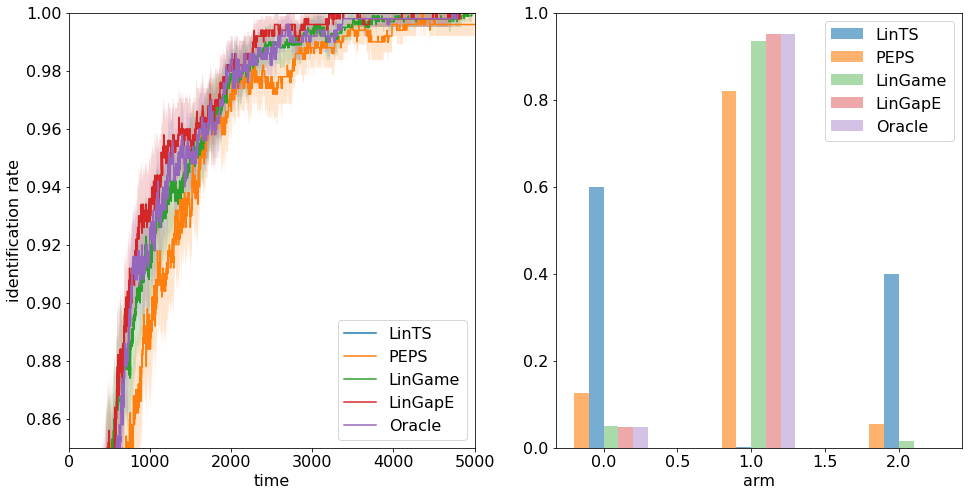

In [153]:
width = 0.1
plt.gcf().set_size_inches(16,8)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

for alg in d['algs'].keys(): 
    if alg!='idx_star':
        if alg == "TopTwoThetaAlgorithm":
            plt.subplot(1,2,1)
            results_ar = d_alg[alg]['results_ar']
            results_p = [np.array(d)/sum(d) for d in d_alg[alg]['results_p']]
            m = (results_ar == idx_star).mean(axis=0)
            s = (results_ar == idx_star).std(axis=0)/np.sqrt(reps)
            
            plt.plot(xaxis, m, label='PEPS')
            plt.fill_between(xaxis, m - 2*s, m + 2*s, alpha=0.2)
            #plt.yscale('log')
            plt.subplot(1,2,2)
            mp = np.mean(results_p, axis=0)
            plt.bar(np.arange(len(mp))-width*3/2, mp, width=width, alpha=.6, label='PEPS')
            
        elif alg == "ThompsonSamplingLinear":
            plt.subplot(1,2,1)
            results_ar = d_alg[alg]['results_ar']
            results_p = [np.array(d)/sum(d) for d in d_alg[alg]['results_p']]
            m_t = (results_ar == idx_star).mean(axis=0)
            s_t = (results_ar == idx_star).std(axis=0)/np.sqrt(reps)
            
            plt.plot(xaxis, m_t, label='LinTS')
            plt.fill_between(xaxis, m_t - 2*s_t, m_t + 2*s_t, alpha=0.2)
            #plt.yscale('log')
            
            plt.subplot(1,2,2)
            mp = np.mean(results_p, axis=0)
            plt.bar(np.arange(len(mp))-width*1/2, mp, width=width, alpha=.6, label='LinTS')
        
#gamification results
plt.subplot(1,2,1)
print(xaxis, m_g, s_g)
plt.plot(xaxis_g, m_g, label='LinGame')
plt.fill_between(xaxis_g, m_g - 2*s_g, m_g + 2*s_g, alpha=0.2)
#plt.yscale('log')
plt.xlim(0,5000)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_g))+width*1/2, mp_g, width=width, alpha=.4, label='LinGame')

#lingape results
plt.subplot(1,2,1)
print(xaxis, m_lge, s_lge)
plt.plot(xaxis_g, m_lge, label='LinGapE')
plt.fill_between(xaxis_g, m_lge - 2*s_lge, m_lge + 2*s_lge, alpha=0.2)
#plt.yscale('log')
plt.xlim(0,5000)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_lge))+width*3/2, mp_lge, width=width, alpha=.4, label='LinGapE')


# oracle result 
plt.subplot(1,2,1)
plt.plot(xaxis_g, m_o, label='Oracle')
plt.fill_between(xaxis_g, m_o - 2*s_o, m_o + 2*s_o, alpha=0.2)
#plt.yscale('log')
plt.xlim(0,5000)
#plt.ylim(0.85,1)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_o))+width*5/2, mp_o, width=width, alpha=.4, label='Oracle')



# optimal allocation - paste it from Julia
# opt = [0.048, 0.952, 0.0]
# plt.subplot(1,2,2)
# plt.bar(np.arange(len(mp_g))+width*3/2, opt, width=width, alpha=.4, label='Optimal')
plt.xlabel('arm')

plt.legend()

plt.savefig('soare_res_alpha_0.1_full.pdf')

In [127]:
# make the table
for delt in [0.1, 0.05, 0.01]:
    id_tt = np.where(m > 1-delt)[0][0]
    id_g = np.where(m_g > 1-delt)[0][0]
    id_lge = np.where(m_lge > 1-delt)[0][0]
    id_o = np.where(m_o > 1-delt)[0][0]
    print(id_tt)
    print(id_g)
    print(id_lge)
    print(id_o)
    
#     print("PEPS: ", id_tt)
#     print("GAME: ", id_g)
#     print("LINGAPE: ", id_lge)
#     print("oracle: ", id_o)

1027
828
708
766
1606
1500
1141
1232
3284
2688
2281
2576


## Sphere plot

In [128]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
d = pickle.load(open('results_Linear-Sphere_500.pkl','rb'))
idx_star = d['idx_star']
reps = d['reps']
d_alg = d['algs']
xaxis = d['xaxis']


In [129]:
import ast
arrays = []

with open('/PureExpThompsonSampling/results_sphere_500_LinGame.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
    
reps = len(arrays)
xaxis_g = np.arange(n_iters)
m_g = (recs == idx_star+1).mean(axis=0)
s_g = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_g = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [130]:
arrays = []

with open('/PureExpThompsonSampling/results_sphere_500_LinGapE.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        #print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
m_lge = (recs == idx_star+1).mean(axis=0)
s_lge = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_lge = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

iters 2980 reps 500


In [131]:
arrays = []

with open('/PureExpThompsonSampling/results_sphere_500_oracle.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        #print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
m_o = (recs == idx_star+1).mean(axis=0)
s_o = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_o = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

iters 2980 reps 500


[   0    1    2 ... 2997 2998 2999] [0.294 0.308 0.308 ... 1.    1.    1.   ] [0.02037469 0.02064636 0.02064636 ... 0.         0.         0.        ]
[   0    1    2 ... 2997 2998 2999] [0.294 0.308 0.308 ... 1.    1.    1.   ] [0.02037469 0.02064636 0.02064636 ... 0.         0.         0.        ]


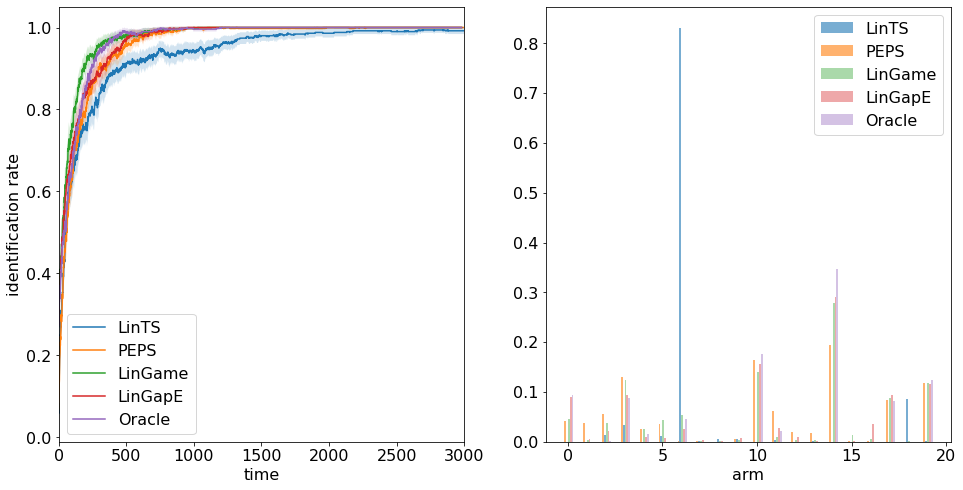

In [132]:
width = 0.1
plt.gcf().set_size_inches(16,8)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

for alg in d['algs'].keys(): 
    if alg!='idx_star':
        if alg == "TopTwoThetaAlgorithm":
            plt.subplot(1,2,1)
            results_ar = d_alg[alg]['results_ar']
            results_p = [np.array(d)/sum(d) for d in d_alg[alg]['results_p']]
            m = (results_ar == idx_star).mean(axis=0)
            s = (results_ar == idx_star).std(axis=0)/np.sqrt(reps)
            
            plt.plot(xaxis, m, label='PEPS')
            plt.fill_between(xaxis, m - 2*s, m + 2*s, alpha=0.2)
            #plt.yscale('log')
            plt.subplot(1,2,2)
            mp = np.mean(results_p, axis=0)
            plt.bar(np.arange(len(mp))-width*3/2, mp, width=width, alpha=.6, label='PEPS')
            
        elif alg == "ThompsonSamplingLinear":
            plt.subplot(1,2,1)
            results_ar = d_alg[alg]['results_ar']
            results_p = [np.array(d)/sum(d) for d in d_alg[alg]['results_p']]
            m_t = (results_ar == idx_star).mean(axis=0)
            s_t = (results_ar == idx_star).std(axis=0)/np.sqrt(reps)
            
            plt.plot(xaxis, m_t, label='LinTS')
            plt.fill_between(xaxis, m_t - 2*s_t, m_t + 2*s_t, alpha=0.2)
            #plt.yscale('log')
            
            plt.subplot(1,2,2)
            mp = np.mean(results_p, axis=0)
            plt.bar(np.arange(len(mp))-width*1/2, mp, width=width, alpha=.6, label='LinTS')
        
#gamification results
plt.subplot(1,2,1)
print(xaxis, m_g, s_g)
plt.plot(xaxis_g, m_g, label='LinGame')
plt.fill_between(xaxis_g, m_g - 2*s_g, m_g + 2*s_g, alpha=0.2)
#plt.yscale('log')
plt.xlim(0,5000)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_g))+width*1/2, mp_g, width=width, alpha=.4, label='LinGame')

#lingape results
plt.subplot(1,2,1)
print(xaxis, m_lge, s_lge)
plt.plot(xaxis_g, m_lge, label='LinGapE')
plt.fill_between(xaxis_g, m_lge - 2*s_lge, m_lge + 2*s_lge, alpha=0.2)
#plt.yscale('log')
plt.xlim(0,5000)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_lge))+width*3/2, mp_lge, width=width, alpha=.4, label='LinGapE')


# oracle result 
plt.subplot(1,2,1)
plt.plot(xaxis_g, m_o, label='Oracle')
plt.fill_between(xaxis_g, m_o - 2*s_o, m_o + 2*s_o, alpha=0.2)
#plt.yscale('log')
plt.xlim(0,3000)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_o))+width*5/2, mp_o, width=width, alpha=.4, label='Oracle')



# optimal allocation - paste it from Julia
# opt = [0.048, 0.952, 0.0]
# plt.subplot(1,2,2)
# plt.bar(np.arange(len(mp_g))+width*3/2, opt, width=width, alpha=.4, label='Optimal')
plt.xlabel('arm')

plt.legend()

plt.savefig('sphere_res_full_2.pdf')

In [134]:
# make the table
for delt in [0.1, 0.05, 0.01]:
    id_tt = np.where(m > 1-delt)[0][0]
    id_g = np.where(m_g > 1-delt)[0][0]
    id_lge = np.where(m_lge > 1-delt)[0][0]
    id_o = np.where(m_o > 1-delt)[0][0]
    id_t = np.where(m_t > 1-delt)[0][0]
    print(id_tt)
    print(id_g)
    print(id_lge)
    print(id_o)
    print(id_t)
    
#     print("PEPS: ", id_tt)
#     print("GAME: ", id_g)
#     print("LINGAPE: ", id_lge)
#     print("oracle: ", id_o)

294
186
316
243
431
476
282
433
328
1046
794
638
690
473
2176


In [92]:
print(arrays[0][0])

[ 30.  47. 120.  32.  75. 980. 127. 115.  28.  42.  96.  83.  79.   6.
  39.  33. 914.  56.  40.  58.]


In [88]:
len(mp)

20

## TopK plots

In [159]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
d = pickle.load(open('results_Linear-Topm_500.pkl','rb'))
idx_star = d['idx_star']
reps = d['reps']
d_alg = d['algs']
xaxis = d['xaxis']

In [155]:
import ast
arrays = []

with open('/PureExpThompsonSampling/results_topm_500_LinGame.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        #print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
    
reps = len(arrays)
xaxis_g = np.arange(n_iters)
m_g = (recs == idx_star+1).mean(axis=0)
s_g = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_g = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

iters 29988 reps 500


In [156]:
import ast
arrays = []

with open('/PureExpThompsonSampling/results_topm_500_LinGapE.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        #print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
    
reps = len(arrays)
xaxis_g = np.arange(n_iters)
m_lge = (recs == idx_star+1).mean(axis=0)
s_lge = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_lge = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

iters 29988 reps 500


In [157]:
import ast
arrays = []

with open('/PureExpThompsonSampling/results_topm_500_oracle.txt', 'r') as f:
    content = f.read().split('\t')  
    for item in content:
        #print(item)
        #print(type(item))
        tuple_data = ast.literal_eval(item)
        arrays.append([np.array(list_data) for list_data in tuple_data])

n_iters = len(arrays[0][1])-1
recs = np.ones([len(arrays), n_iters])
pulls = np.ones([len(arrays), len(arrays[0][0])])

for i in range(len(arrays)):
    arr = arrays[i]
    recs_item = np.array(arr[1])
    #recs[i,0:(len(recs_item)-1)] = recs_item[1:]
    recs[i] = recs_item[1:]
    pulls[i] = np.array(arr[0])/np.sum(arr[0])
    
    
reps = len(arrays)
xaxis_g = np.arange(n_iters)
m_o = (recs == idx_star+1).mean(axis=0)
s_o = (recs == idx_star+1).std(axis=0)/np.sqrt(reps)

mp_o = np.mean(pulls, axis=0)
print('iters', n_iters, 'reps', reps)

iters 29988 reps 500


[    0     1     2 ... 29997 29998 29999] [0.128 0.2   0.184 ... 0.896 0.896 0.896] [0.01494095 0.01788854 0.01732882 ... 0.01365167 0.01365167 0.01365167]
[    0     1     2 ... 29997 29998 29999] [0.128 0.146 0.146 ... 0.926 0.926 0.926] [0.01494095 0.01579139 0.01579139 ... 0.01170675 0.01170675 0.01170675]


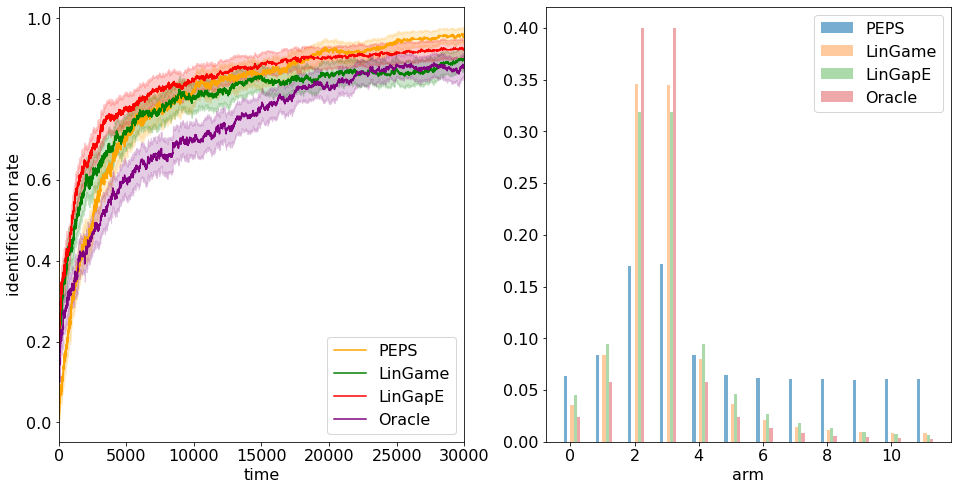

In [165]:
width = 0.1
plt.gcf().set_size_inches(16,8)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

for alg in d['algs'].keys(): 
    if alg!='idx_star':
        if alg == "TopTwoThetaAlgorithm":
            plt.subplot(1,2,1)
            results_ar = d_alg[alg]['results_ar']
            results_p = [np.array(d)/sum(d) for d in d_alg[alg]['results_p']]
            m = (results_ar == idx_star).mean(axis=0)
            s = (results_ar == idx_star).std(axis=0)/np.sqrt(reps)
            
            plt.plot(xaxis, m, label='PEPS', color="orange")
            plt.fill_between(xaxis, m - 2*s, m + 2*s, alpha=0.2, color="orange")
            #plt.yscale('log')
            plt.subplot(1,2,2)
            mp = np.mean(results_p, axis=0)
            plt.bar(np.arange(len(mp))-width*3/2, mp, width=width, alpha=.6, label='PEPS')
        
        elif alg == "ThompsonSamplingLinear":
            plt.subplot(1,2,1)
            results_ar = d_alg[alg]['results_ar']
            results_p = [np.array(d)/sum(d) for d in d_alg[alg]['results_p']]
            m_t = (results_ar == idx_star).mean(axis=0)
            s_t = (results_ar == idx_star).std(axis=0)/np.sqrt(reps)
            
            plt.plot(xaxis, m_t, label='LinTS', color="blue")
            plt.fill_between(xaxis, m_t - 2*s_t, m_t + 2*s_t, alpha=0.2, color="blue")
            #plt.yscale('log')
            
            plt.subplot(1,2,2)
            mp = np.mean(results_p, axis=0)
            plt.bar(np.arange(len(mp))-width*1/2, mp, width=width, alpha=.6, label='LinTS')
        
#gamification results
plt.subplot(1,2,1)
print(xaxis, m_g, s_g)
plt.plot(xaxis_g, m_g, label='LinGame', color="green")
plt.fill_between(xaxis_g, m_g - 2*s_g, m_g + 2*s_g, alpha=0.2, color="green")
#plt.yscale('log')
plt.xlim(0,5000)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_g))+width*1/2, mp_g, width=width, alpha=.4, label='LinGame')

#lingape results
plt.subplot(1,2,1)
print(xaxis, m_lge, s_lge)
plt.plot(xaxis_g, m_lge, label='LinGapE', color="red")
plt.fill_between(xaxis_g, m_lge - 2*s_lge, m_lge + 2*s_lge, alpha=0.2, color="red")
#plt.yscale('log')
plt.xlim(0,5000)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_lge))+width*3/2, mp_lge, width=width, alpha=.4, label='LinGapE')


# oracle result 
plt.subplot(1,2,1)
plt.plot(xaxis_g, m_o, label='Oracle', color="purple")
plt.fill_between(xaxis_g, m_o - 2*s_o, m_o + 2*s_o, alpha=0.2, color="purple")
#plt.yscale('log')
plt.xlim(0,30000)
plt.xlabel('time')
plt.ylabel('identification rate')
plt.legend()
# plt.title("Identification rate for each algorithm")

plt.subplot(1,2,2)
plt.bar(np.arange(len(mp_o))+width*5/2, mp_o, width=width, alpha=.4, label='Oracle')



# optimal allocation - paste it from Julia
# opt = [0.048, 0.952, 0.0]
# plt.subplot(1,2,2)
# plt.bar(np.arange(len(mp_g))+width*3/2, opt, width=width, alpha=.4, label='Optimal')
plt.xlabel('arm')

plt.legend()

plt.savefig('topm_res_full_2.pdf')

In [145]:
# make the table
# for delt in [0.2, 0.1, 0.05]:
#     id_tt = np.where(m > 1-delt)[0][0]
#     #id_g = np.where(m_g > 1-delt)[0][0]
#     id_lge = np.where(m_lge > 1-delt)[0][0]
#     #id_o = np.where(m_o > 1-delt)[0][0]
#     print(id_tt)
#     print(id_g)
#     print(id_lge)
#     print(id_o)
    
delt = 0.05 
id_tt = np.where(m > 1-delt)[0][0]
#id_g = np.where(m_g > 1-delt)[0][0]
#id_lge = np.where(m_lge > 1-delt)[0][0]
#id_o = np.where(m_o > 1-delt)[0][0]

print("PEPS: ", id_tt)
#print("GAME: ", id_g)
print("LINGAPE: ", id_lge)
#print("oracle: ", id_o)

PEPS:  26118
LINGAPE:  17352
